In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
credit_card_data=pd.read_csv('/content/creditcard.csv')

In [5]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#checking missing values
null_counts = credit_card_data.isnull().sum()
print(null_counts)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


UNBALANCED DATASET

0 IS NORMAL AND 1 IS FRAUD

In [10]:
#sepereating
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
#Statistics measure
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [12]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [13]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<function matplotlib.pyplot.show(close=None, block=None)>

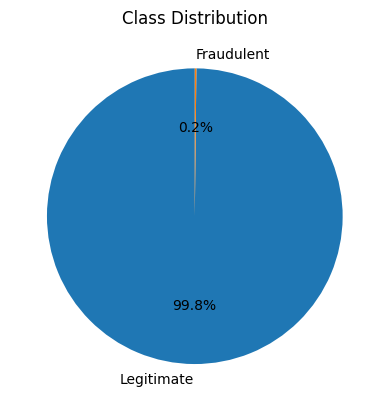

In [34]:
plt.pie(credit_card_data['Class'].value_counts(),
        labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show

under-sampling number of legitimate transactions =440


In [14]:
legit_sample=legit.sample(n=440)

concat two dataset

In [15]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
115550,73908.0,1.282851,0.173001,-0.192308,0.318849,0.151220,-0.103773,-0.107592,0.079019,0.018792,...,-0.321601,-1.025984,-0.019742,-0.907806,0.302355,0.152416,-0.036790,0.007516,7.99,0
188000,127781.0,1.927944,0.096923,-3.681598,0.494953,3.200485,3.074364,0.147253,0.652454,-0.019715,...,-0.013535,-0.020496,-0.031904,0.580945,0.495594,-0.475771,0.011254,-0.027372,52.48,0
272570,165156.0,2.135394,-1.002830,-0.760955,-1.102071,-0.591819,0.247162,-1.086756,0.079860,-0.251782,...,0.361448,1.092490,0.089508,0.284037,-0.086937,-0.112277,0.008764,-0.052415,22.00,0
26912,34305.0,0.844454,-0.220778,0.344528,1.214150,0.336553,1.599756,-0.230794,0.582850,0.051724,...,0.088545,0.413684,-0.001727,-0.811098,0.328577,-0.248754,0.077322,0.006400,70.00,0
146830,87911.0,-1.505773,1.284435,-0.383093,-2.853673,0.575657,-0.768087,0.709327,0.451119,0.410568,...,-0.322308,-0.997106,-0.128507,-1.080677,0.086165,0.421024,0.173032,0.192008,1.00,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset['Class'].value_counts()

,count
Class,
1,492
0,440


In [19]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93816.854545,-0.005337,-0.063025,-0.080372,-0.093231,0.234722,-0.007827,-0.038743,0.064376,-0.012721,...,-0.019953,-0.049709,-0.014205,-0.011483,-0.041423,-0.010650,0.032157,0.012550,-0.007412,82.645159
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<function matplotlib.pyplot.show(close=None, block=None)>

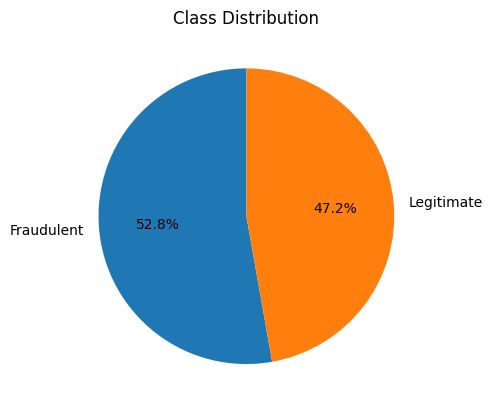

In [35]:
plt.pie(new_dataset['Class'].value_counts(), labels=['Fraudulent','Legitimate' ],
        autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show

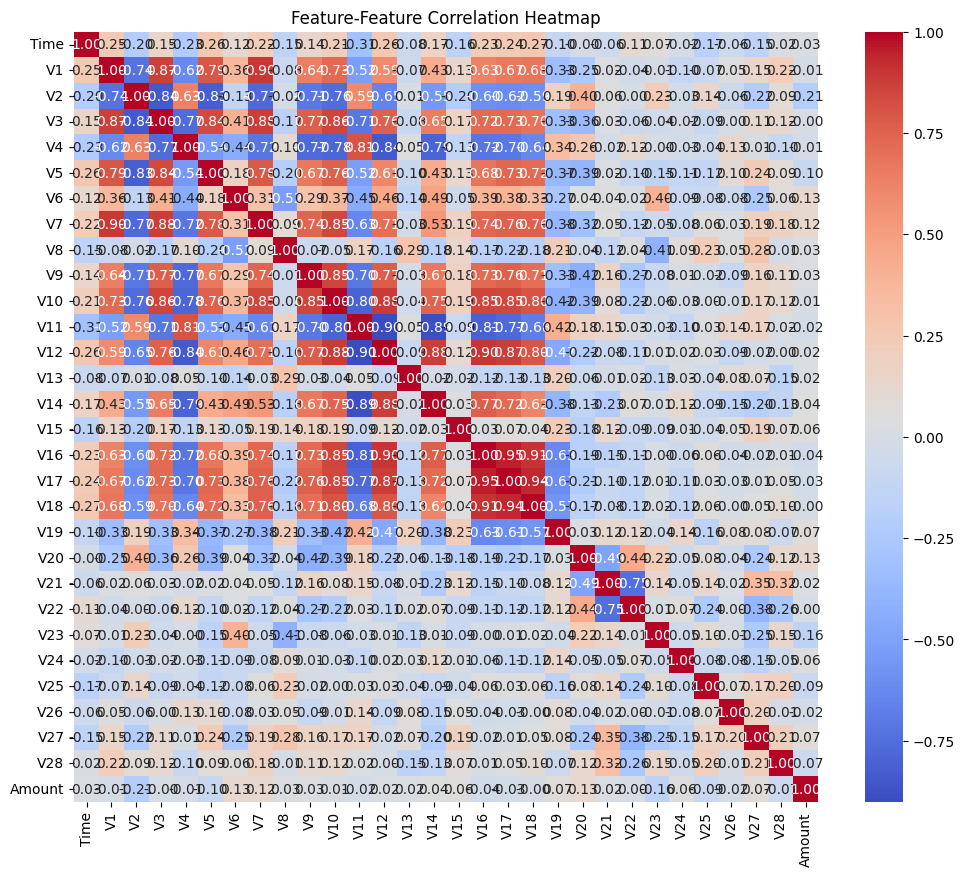

In [20]:

X = new_dataset[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']]
Y = new_dataset['Class']
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature-Feature Correlation Heatmap')
plt.show()

In [21]:
X = X.drop(columns = ["V3", "V11", "V12", "V5", "V17", "V18"])

In [ ]:
print(X)

            Time        V1        V2        V4        V6        V7        V8  \
23245    32654.0  0.761355 -1.442516  0.650921  0.179131 -0.368765 -0.045469   
73584    55196.0 -1.768515  0.287589 -1.414939  0.870940  0.013211  0.996880   
204476  135299.0 -0.908227  0.480574 -1.169857  0.038950  0.258755  0.216526   
138469   82661.0 -2.074748 -0.066213  0.399323  0.173498 -0.529839  0.899271   
144065   85840.0 -0.606138  0.858365 -0.235629  0.127197  0.400726  0.279454   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653  1.749293 -2.010494 -0.882850  0.697211   
280143  169347.0  1.378559  1.289381  1.411850 -1.326536 -1.413170  0.248525   
280149  169351.0 -0.676143  1.126366  0.468308 -0.003346 -2.234739  1.210158   
281144  169966.0 -3.113832  0.585864  1.817092 -2.943548 -2.208002  1.058733   
281674  170348.0  1.991976  0.158476  0.408670 -0.096695  0.223050 -0.068384   

              V9       V10       V13  .

In [22]:
print(Y)

115550    0
188000    0
272570    0
26912     0
146830    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 932, dtype: int64


In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(932, 24) (745, 24) (187, 24)


In [1]:


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [26]:
# Choose the number of components (e.g., n_components=2 for 2 principal components)
pca = PCA(n_components=21)

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Model Training

Naive bayes


In [27]:
class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = None
        self.variance = None
        self.prior = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        num_classes = len(self.classes)
        num_features = X.shape[1]

        self.mean = np.zeros((num_classes, num_features))
        self.variance = np.zeros((num_classes, num_features))
        self.prior = np.zeros(num_classes)

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i, :] = X_c.mean(axis=0)
            self.variance[i, :] = X_c.var(axis=0)
            self.prior[i] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(self.prior[i])
            likelihood = np.sum(np.log(self._gaussian_pdf(x, self.mean[i, :], self.variance[i, :])))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def _gaussian_pdf(self, x, mean, variance):
        exponent = -((x - mean) ** 2) / (2 * variance)
        return np.exp(exponent) / (np.sqrt(2 * np.pi * variance))



Custom C4.5

In [28]:
# Node class for the Decision Tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
# Decision Tree Class (Custom C4.5 style, use gini impurity of cart style)
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2,**kwargs):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _gini_impurity(self, y):
        unique_classes, counts = np.unique(y, return_counts=True)
        impurity = 1 - np.sum((counts / len(y)) ** 2)
        return impurity

    def _best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_gini = float('inf')

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_idx = X[:, feature] <= threshold
                right_idx = X[:, feature] > threshold

                if len(y[left_idx]) >= self.min_samples_split and len(y[right_idx]) >= self.min_samples_split:
                    gini_left = self._gini_impurity(y[left_idx])
                    gini_right = self._gini_impurity(y[right_idx])
                    gini_split = (len(y[left_idx]) / len(y)) * gini_left + (len(y[right_idx]) / len(y)) * gini_right
                    if gini_split < best_gini:
                        best_gini = gini_split
                        best_feature = feature
                        best_threshold = threshold
        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        if depth == self.max_depth or len(np.unique(y)) == 1 or len(y) < self.min_samples_split:
            most_common = np.bincount(y).argmax()
            return Node(value=most_common)

        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            most_common = np.bincount(y).argmax()
            return Node(value=most_common)

        left_idx = X[:, best_feature] <= best_threshold
        right_idx = X[:, best_feature] > best_threshold

        left_subtree = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right_subtree = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _predict_single(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_single(x, node.left)
        else:
            return self._predict_single(x, node.right)

    def predict(self, X):
        return np.array([self._predict_single(x, self.root) for x in X])


Model Evaluation

In [39]:
# Instantiate the models
naive_bayes_model = GaussianNaiveBayes()
decision_tree_model = DecisionTree(random_state=2)

# Fit the models to the training data
naive_bayes_model.fit(X_train_scaled, Y_train)
decision_tree_model.fit(X_train_scaled, Y_train)

# Make predictions
y_pred_nb_test = naive_bayes_model.predict(X_test_scaled)
y_pred_dt_test = decision_tree_model.predict(X_test_scaled)

# Calculate and print the confusion matrices
conf_matrix_nb = confusion_matrix(Y_test, y_pred_nb_test)
print("Confusion Matrix (Gaussian Naive Bayes):\n", conf_matrix_nb)

conf_matrix_dt = confusion_matrix(Y_test, y_pred_dt_test)
print("Confusion Matrix (Decision Tree):\n", conf_matrix_dt)


Confusion Matrix (Gaussian Naive Bayes):
 [[86  2]
 [13 86]]
Confusion Matrix (Decision Tree):
 [[84  4]
 [12 87]]
F1 Score (Gaussian Naive Bayes): 0.9197860962566845
F1 Score (Decision Tree): 0.9157894736842105
Precision Score (Gaussian Naive Bayes): 0.9772727272727273
Precision Score (Decision Tree): 0.9560439560439561
Recall Score (Gaussian Naive Bayes): 0.8686868686868687
Recall Score (Decision Tree): 0.8787878787878788


In [40]:
# Calculate and print the F1 scores
f1_nb = f1_score(Y_test, y_pred_nb_test)
print("F1 Score (Gaussian Naive Bayes):", f1_nb)

f1_dt = f1_score(Y_test, y_pred_dt_test)
print("F1 Score (Decision Tree):", f1_dt)

F1 Score (Gaussian Naive Bayes): 0.9197860962566845
F1 Score (Decision Tree): 0.9157894736842105


In [41]:
# Calculate and print the precision scores
precision_nb = precision_score(Y_test, y_pred_nb_test)
print("Precision Score (Gaussian Naive Bayes):", precision_nb)

precision_dt = precision_score(Y_test, y_pred_dt_test)
print("Precision Score (Decision Tree):", precision_dt)

Precision Score (Gaussian Naive Bayes): 0.9772727272727273
Precision Score (Decision Tree): 0.9560439560439561


In [42]:
# Calculate and print the recall scores
recall_nb = recall_score(Y_test, y_pred_nb_test)
print("Recall Score (Gaussian Naive Bayes):", recall_nb)

recall_dt = recall_score(Y_test, y_pred_dt_test)
print("Recall Score (Decision Tree):", recall_dt)

Recall Score (Gaussian Naive Bayes): 0.8686868686868687
Recall Score (Decision Tree): 0.8787878787878788


Results

Accuracy  for Training

In [38]:
# Naive Bayes accuracy on training data:
x_train_predict_nb = naive_bayes_model.predict(X_train_scaled)
training_data_accuracy_nb = accuracy_score(x_train_predict_nb, Y_train)
print("Training Accuracy with Gaussian Naive Bayes: {:.10f}".format(training_data_accuracy_nb))

# Decision Tree accuracy on training data:
decision_tree_model = DecisionTree(random_state=2, max_depth=5, min_samples_split=20)
decision_tree_model.fit(X_train_scaled, Y_train)
x_train_predict_dt = decision_tree_model.predict(X_train_scaled)
training_data_accuracy_dt = accuracy_score(x_train_predict_dt, Y_train)
print("Training Accuracy with Decision Tree (C4.5): {:.10f}".format(training_data_accuracy_dt))

<ipython-input-27-d192902d1f88>:32: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._gaussian_pdf(x, self.mean[i, :], self.variance[i, :])))


Training Accuracy with Gaussian Naive Bayes: 0.8953020134
Training Accuracy with Decision Tree (C4.5): 0.9409395973


Accuracy  for Testing


In [ ]:
# Make predictions and evaluate for naive bayes
y_pred_nb = naive_bayes_model.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_pred_nb, Y_test)
print("Test Accuracy with Gaussian Naive Bayes:", accuracy_nb)

# Make predictions and evaluate for custom c4.5
y_pred_dt = decision_tree_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_pred_dt, Y_test)
print("Test Accuracy with Decision Tree (C4.5):", accuracy_dt)